## Fit 3D Variogram Functions

The 3D Gaussian variogram function has the following form:

$\gamma = s(1 - e^{-3h^{\top} \Omega h} + 0.06e^{-7.07h^{\top} \Omega h})$

where $\Omega$ is a diagonal matrix with diagonal terms $= [\frac{1}{{r_{lon}}^2}, \frac{1}{{r_{lat}}^2}, \frac{1}{{r_{time}}^2}]$

In [19]:
%load_ext autoreload
%autoreload 2

from ocean_navigation_simulator.generative_error_model.variogram.VariogramFitting import VariogramFitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in 2D/3D variogram data
file_path = "/home/jonas/Downloads/tuned_variograms/tuned_variogram_2d_cross_buoy_only.csv"
# file_path = "/home/jonas/Downloads/tuned_variograms/tuned_variogram_2d.csv"
data = pd.read_csv(file_path)
data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,space_lag,t_lag,u_semivariance,v_semivariance
0,10,5,0.166656,0.206893
1,10,10,0.398217,0.378309
2,10,15,0.492462,0.433275
3,10,20,0.502607,0.444698
4,10,25,0.374501,0.354957
...,...,...,...,...
7995,800,480,1.006384,1.027122
7996,800,485,1.045250,1.010631
7997,800,490,1.063253,0.996242
7998,800,495,1.075005,1.021415


In [21]:
fitted_v = VariogramFitting(data, ("space_lag", "t_lag"), error_var="u_semivariance")
# list of optimization algorithms: https://lmfit.github.io/lmfit-py/fitting.html
fitted_v.fit_model(4, method="emcee", constrain_weighting=True)

Number of models: 4
Type of model: gaussian_2d


100%|██████████| 1000/1000 [00:47<00:00, 21.09it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 92.47930935 108.19563918 109.15908623  97.10684498 109.50068472
 109.05630376  94.64231042  99.99194777 103.31256148 103.09549606
 105.17441542]
Parameters:
 [[2.22044688e-01 9.50519584e+01 1.21339272e+02]
 [2.02199854e-01 1.28893592e+02 1.15071699e+02]
 [1.59992370e-01 5.76002938e+02 5.36086172e+02]
 [4.15763089e-01 6.67548163e+02 5.43732428e+02]]


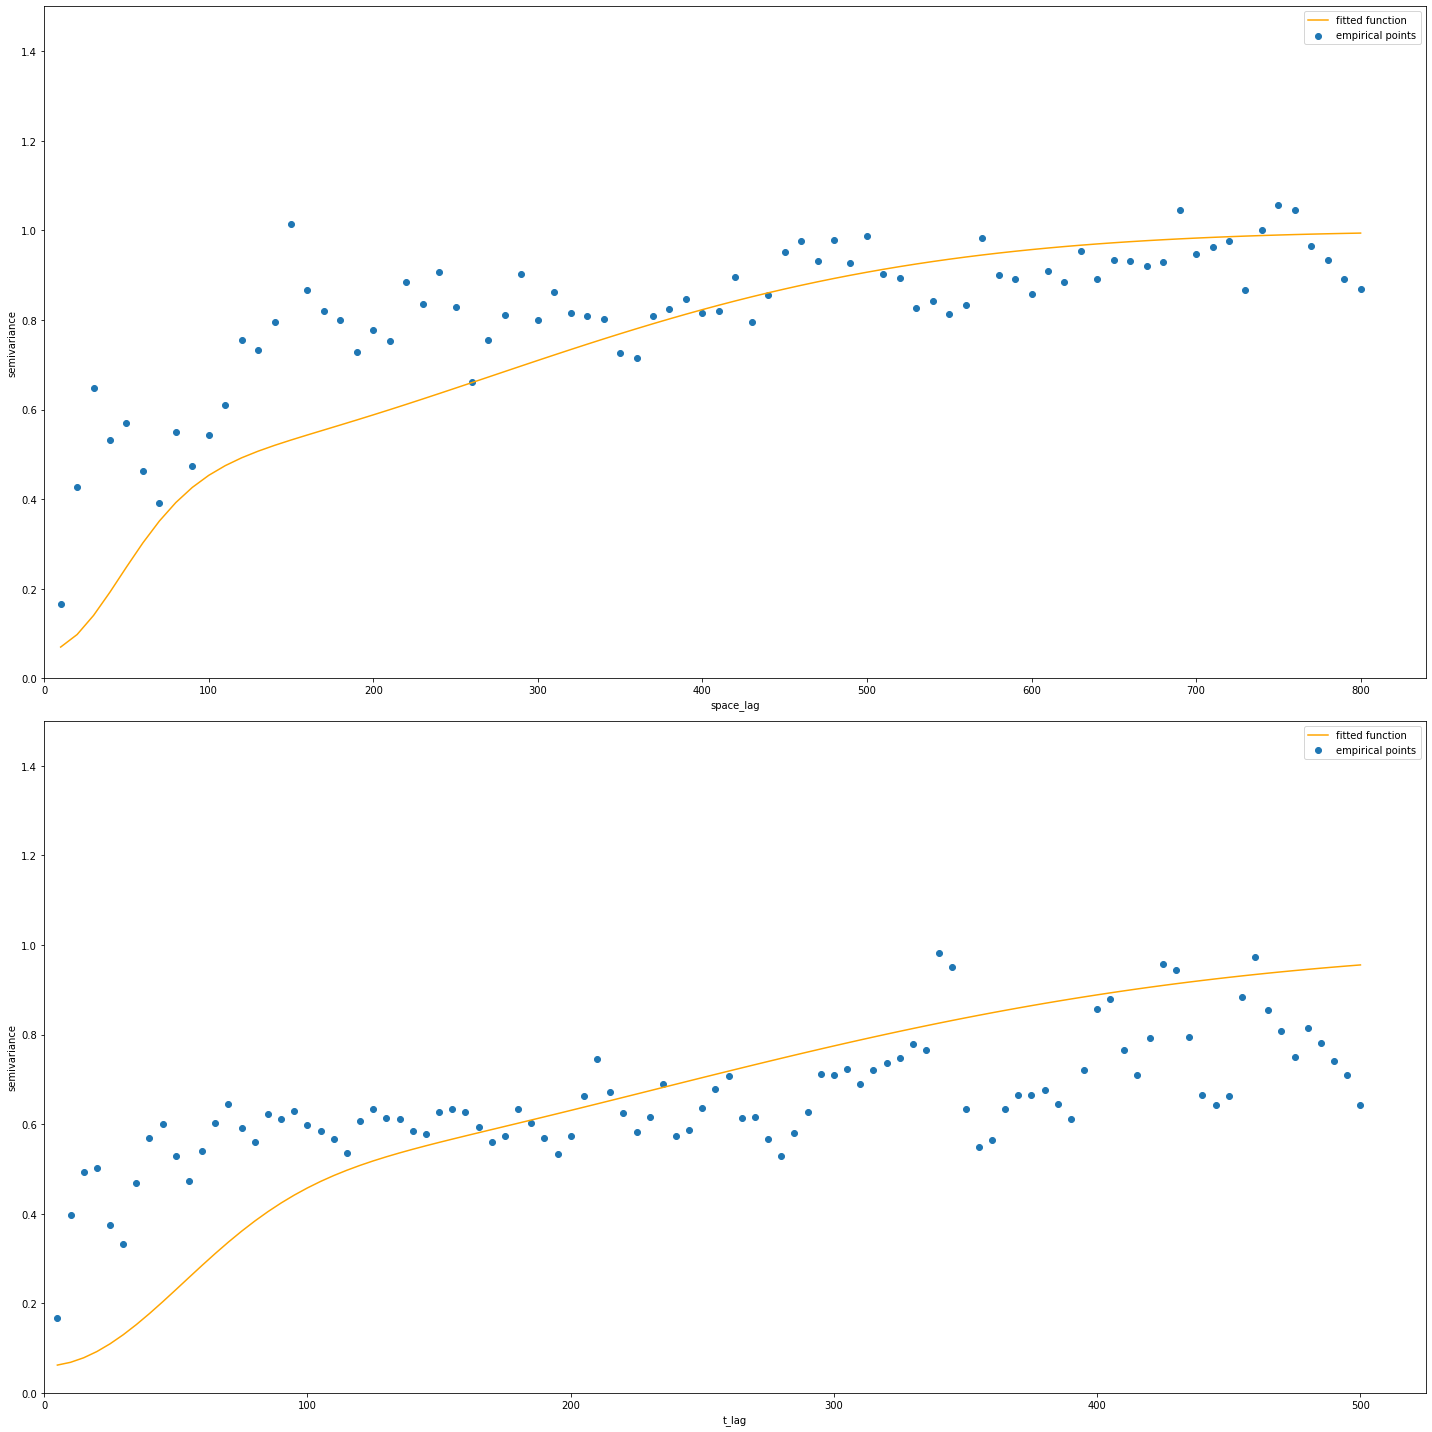

In [22]:
save_path = f"/home/jonas/Downloads/plots/fitted_func_only_cross_buoy.png"
figure = fitted_v.plot_all_dims(save_path=None)

In [37]:
# save parameters
params = fitted_v.popt
print(params)

if len(fitted_v.lag_vars) == 2:
# need to convert 2d to 3d
    params = np.hstack((params[:,0].reshape(-1,1),
                        params[:,1].reshape(-1,1),
                        params[:,1].reshape(-1,1),
                        params[:,2].reshape(-1,1)))

params_dict = {"U_COMP": [], "V_COMP": []}
for i in range(params.shape[0]):
    params_dict["U_COMP"].append(params[i])
    params_dict["V_COMP"].append(params[i])

print(params_dict)


np.save("/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/variogram_params/hindcast_area1_True_True.npy", params_dict)

[[2.22044688e-01 9.50519584e+01 1.21339272e+02]
 [2.02199854e-01 1.28893592e+02 1.15071699e+02]
 [1.59992370e-01 5.76002938e+02 5.36086172e+02]
 [4.15763089e-01 6.67548163e+02 5.43732428e+02]]
{'U_COMP': [array([  0.22204469,  95.05195838,  95.05195838, 121.33927229]), array([  0.20219985, 128.89359172, 128.89359172, 115.07169859]), array([1.59992370e-01, 5.76002938e+02, 5.76002938e+02, 5.36086172e+02]), array([4.15763089e-01, 6.67548163e+02, 6.67548163e+02, 5.43732428e+02])], 'V_COMP': [array([  0.22204469,  95.05195838,  95.05195838, 121.33927229]), array([  0.20219985, 128.89359172, 128.89359172, 115.07169859]), array([1.59992370e-01, 5.76002938e+02, 5.76002938e+02, 5.36086172e+02]), array([4.15763089e-01, 6.67548163e+02, 6.67548163e+02, 5.43732428e+02])]}


In [44]:
import os
root = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/"
path = os.path.join(root, "variogram/2d_hindcast_variogram_area1_True_True.npy")
variogram = np.load(path, allow_pickle=True)
list(variogram.item().get("detrend_metrics").values())[0]

{'u_error': [-0.06938110274000732, 0.19566641387425715],
 'v_error': [-0.03511778008057404, 0.19982908711777983]}